####The Drive is Mounted, as the relevant data file is placed on Google Drive (due to it's large size)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


####Importing the required libraries

In [2]:
from matplotlib import pyplot as PLT
from matplotlib import cm as CM
from matplotlib import mlab as ML
import numpy as NP
import pandas as pd

####Etablished a classs that will assist to check of a point lies within the specified boundary

In [3]:
class Point:
    def __init__(self, x, y, z):
        self.x = x
        self.y = y
        self.z = z
 
class line:
    def __init__(self, p1, p2):
        self.p1 = p1
        self.p2 = p2
 
def onLine(l1, p):
    if (
        p.x <= max(l1.p1.x, l1.p2.x)
        and p.x <= min(l1.p1.x, l1.p2.x)
        and (p.y <= max(l1.p1.y, l1.p2.y) and p.y <= min(l1.p1.y, l1.p2.y))
    ):
        return True
    return False
 
def direction(a, b, c):
    val = (b.y - a.y) * (c.x - b.x) - (b.x - a.x) * (c.y - b.y)
    if val == 0:
        # Collinear
        return 0
    elif val < 0:
        # Anti-clockwise direction
        return 2
    # Clockwise direction
    return 1
 
def isIntersect(l1, l2):
    # Four direction for two lines and points of other line
    dir1 = direction(l1.p1, l1.p2, l2.p1)
    dir2 = direction(l1.p1, l1.p2, l2.p2)
    dir3 = direction(l2.p1, l2.p2, l1.p1)
    dir4 = direction(l2.p1, l2.p2, l1.p2)
 
    # When intersecting
    if dir1 != dir2 and dir3 != dir4:
        return True
 
    # When p2 of line2 are on the line1
    if dir1 == 0 and onLine(l1, l2.p1):
        return True
 
    # When p1 of line2 are on the line1
    if dir2 == 0 and onLine(l1, l2.p2):
        return True
 
    # When p2 of line1 are on the line2
    if dir3 == 0 and onLine(l2, l1.p1):
        return True
 
    # When p1 of line1 are on the line2
    if dir4 == 0 and onLine(l2, l1.p2):
        return True
 
    return False
 
def checkInside(poly, n, p):
    # When polygon has less than 3 edge, it is not polygon
    if n < 3:
        return False
 
    # Create a point at infinity, y is same as point p
    exline = line(p, Point(9999, p.y, p.z))
    count = 0
    i = 0
    while True:
        # Forming a line from two consecutive points of poly
        side = line(poly[i], poly[(i + 1) % n])
        if isIntersect(side, exline):
            # If side is intersects ex
            if (direction(side.p1, p, side.p2) == 0):
                return onLine(side, p);
            count += 1
         
        i = (i + 1) % n;
        if i == 0:
            break
 
    # When count is odd
    return count & 1

#Q1: Write a python class called ProcessGameState that will accomplish the following: 

**a. Handle file ingestion and ETL (if deemed necessary)**

**b. Return whether or not each row falls within a provided boundary**

> i. Be as efficient as possible (minimize runtime)

> ii. Reduce dependencies outside of standard Python libraries unless
you can prove significant improvements.

**c. Extract the weapon classes from the inventory json column**

In [4]:
class ProcessGameState: #Creating the "ProcessGameState" class as required
  
  def __init__(self) -> None: #Reading the 'pickle' data file
      unpickled_data = pd.read_pickle('/content/drive/MyDrive/Evil Geniuses/game_state_frame_data.pickle')
      self.data = unpickled_data 

  def isInside(self, point, boundary, Z_Bound_lower, Z_Bound_upper) -> bool: #Class Member Function to check if a given point lies inside the boundary

    if((point.z < Z_Bound_lower) or (point.z > Z_Bound_upper)): #Checking if the given point lies in the permissible Z-range or not
      return False

    return (bool)(checkInside(boundary, len(boundary), point)) #If the point lies inside the permissible Z-range, check if the point lies inside the boundary in X-Y plane

  def extractWeapon(self, ammo_List): #Class Member Function to extract weapon class details from the 'inventory' column
    weapon_class = []

    for weapon in ammo_List:
      weapon_class.append(weapon['weapon_class']) #Extracting the weapon class for a particular data row in the 'pickle' file

    return weapon_class #Returning an array of the weapon classes of all the weapons that a particular player is carrying (i.e for a specified data row in the 'pickle' file)

#2. Using the created class, answer the following questions:

**a. Is entering via the light blue boundary a common strategy used by
Team2 on T (terrorist) side?**

-> *Answer: This functionality is implemented by using the "isInside()" function of the "ProcessGameState" class, where the provided blue boundary co-ordinates are supplied as parameters, and the Z-axis bounds are also supplied as parameters. We iterate over each row of the 'pickle' dataset (where the team is "Team2", and the side is "T" (i,e Terrorist)), and if there are 2 consecutive rows for a player, where for the previous row the player was inside the light-blue boundary, and for the next row the player was outside the light-blue boundary, then we can say that the player entered via the light-blue boundary. This procedure has to conducted for each player for every round in the game, and such instances are counted. The answer for this question is that there is a 2.6667% chance that a Team2 side Terrorist enters via the blue boundary.*

**b. What is the average timer that Team2 on T (terrorist) side enters
“BombsiteB” with least 2 rifles or SMGs?**

-> *Answer: For this functionality, we iterate over all the rows of the 'pickle'dataset, and compute the average timer of all the players who were on the "T" (Terrorist) side of "Team2", and who had atleast 2 rifles or SMGs. This functionality was implemented using the "extractWeapon()" function of the "ProcessGameState" class. No player from Team2 on T (terrorist) side enters “BombsiteB” with least 2 rifles or SMGs.*

**c. Now that we’ve gathered data on Team2 T side, let's examine their CT
(counter-terrorist) Side. Using the same data set, tell our coaching
staff where you suspect them to be waiting inside “BombsiteB”**

-> *Answer: For this functionality, we iterate over all the rows of the 'pickle'dataset, and compute the average timer of all the players who were on the "CT" (counter-terrorist) side of "Team2", and we extract their respective X, Y, Z co-ordinates inside "BombSiteB". We then plot the heat-map across the X-Y, Y-Z, and Z-X planes respectively to obtain a clear understanding of the position of the players in the 3D space.*

In [5]:
P = ProcessGameState() #Creating an object of the "ProcessGameState" Class

#Q2-Part(a)

boundary = [Point(-1735, 250, 0), Point(-2024, 398, 0 ), Point(-2806, 742, 0), Point(-2472, 1233, 0), Point(-1565, 580, 0)]; #The blue boundary co-ordinates as given in the question PDF

count = 0

player_Round_Pair = {}

for idx in P.data.index: #Iterating over all the rows in the dataset
  
  if(idx == len(P.data.index) - 1): #If it's the last row then continue 
    break

  if(P.data['team'][idx] != 'Team2' or P.data['side'][idx] != 'T'): #Only taking those rows into consideration that have player from "Team 2" as well as on "T" (Terrorist) side
    continue

  if((P.data['player'][idx], P.data['round_num'][idx]) in player_Round_Pair.keys() and player_Round_Pair[(P.data['player'][idx], P.data['round_num'][idx])] == True): #Checking if the player and round_num pair is already considered
    continue

  player_Round_Pair[(P.data['player'][idx], P.data['round_num'][idx])] = False 
  
  if(P.isInside(Point(P.data['x'][idx], P.data['y'][idx], P.data['z'][idx]), boundary, 284, 421) and not P.isInside(Point(P.data['x'][idx + 1], P.data['y'][idx + 1], P.data['z'][idx + 1]), boundary, 284, 421)):
    player_Round_Pair[(P.data['player'][idx], P.data['round_num'][idx])] = True #Found that a Team2 Terrorist has crossed the light-blue boundary
    count+=1

print('Percentage of (player, round_num) pair that entered via the light blue boundary (for Team2, Terrorist side): ',count/len(player_Round_Pair.keys()) * 100,'%')

Percentage of (player, round_num) pair that entered via the light blue boundary (for Team2, Terrorist side):  2.666666666666667 %


In [6]:
#Q2-Part(b)

validCount = 0
validTime = 0

bomb_site_pair = {}

totalTime = 0
totalPlayers = 0

for idx in P.data.index:
  if(P.data['team'][idx] != 'Team2' or P.data['side'][idx] != 'T' or P.data['area_name'][idx] != 'BombsiteB' or bomb_site_pair.get((P.data['player'][idx], P.data['round_num'][idx]), False) == True): #Only considering Team2 Terrorist players in BombSiteB
    continue

  bomb_site_pair[(P.data['player'][idx], P.data['round_num'][idx])] = True #Marking the (player, round_num) pair as "True", as the player has entered the BombSiteB in this round

  if(P.data['inventory'][idx] is not None): #If the player has some weapons
    rifles_count = 0 #Count to store the number of rifles with the current player in the current game round
    smg_count = 0 #Count to store the number of SMGs with the current player in the current game round

    weapon_class = P.extractWeapon(P.data['inventory'][idx]) #Extracting the weapon classes using the "extractWeapon()" function

    for weapon in weapon_class: #Iterating over all the weapons with the current player in the current round
      if(weapon == 'Rifle'): #If there is a rifle
        rifles_count += 1

      elif(weapon == 'SMG'): #If there is an SMG
        smg_count += 1
  
    if(rifles_count >= 2 or smg_count >= 2): #Only if the current player in the current round has atleast 2 rifles or SMGs, then only it's time is considered for computing the average timer
      totalTime += P.data['seconds'][idx] 
      totalPlayers += 1

if(totalTime == 0 and totalPlayers == 0): #No player from Team2 on T (terrorist) side enters “BombsiteB” with least 2 rifles or SMGs
  print('No player has individually atleast 2 Rifles or SMGs on Team2 Terrorist side while entering “BombsiteB”')

else:
  print('The average time (seconds) spent by the player (after spawning) that has atleast 2 Rifles or SMGs on Team2 Terrorist side while entering “BombsiteB is: ”', (totalTime)/(totalPlayers))

No player has individually atleast 2 Rifles or SMGs on Team2 Terrorist side while entering “BombsiteB”


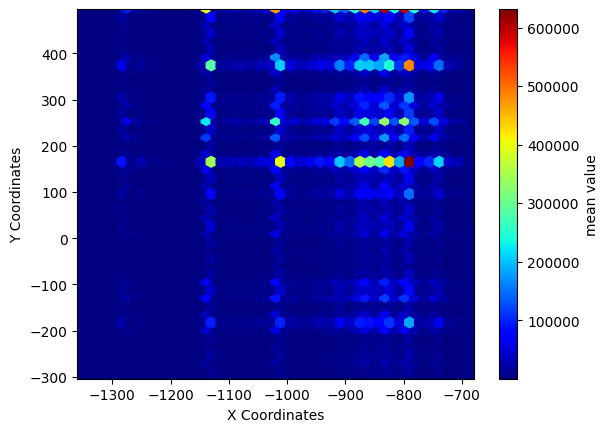

In [7]:
#Q2-Part(b)

# Generating heat plot in the X-Y plane for position of the player

x = []
y = []
z = []

for idx in P.data.index:
  if(P.data['team'][idx] != 'Team2' or P.data['side'][idx] != 'CT' or P.data['area_name'][idx] != 'BombsiteB'): #Only considering Team2 Counter-Terrorist players in BombSiteB
    continue

  x.append(P.data['x'][idx])
  y.append(P.data['y'][idx])
  z.append(P.data['z'][idx])

X, Y = NP.meshgrid(x, y)
X = X.ravel()
Y = Y.ravel()

gridsize=40
PLT.subplot(111)

PLT.hexbin(X, Y, gridsize=gridsize, cmap=CM.jet, bins=None)
PLT.axis([X.min(), X.max(), Y.min(), Y.max()])
PLT.xlabel('X Coordinates')
PLT.ylabel('Y Coordinates')

cb = PLT.colorbar()
cb.set_label('mean value')
PLT.show()  

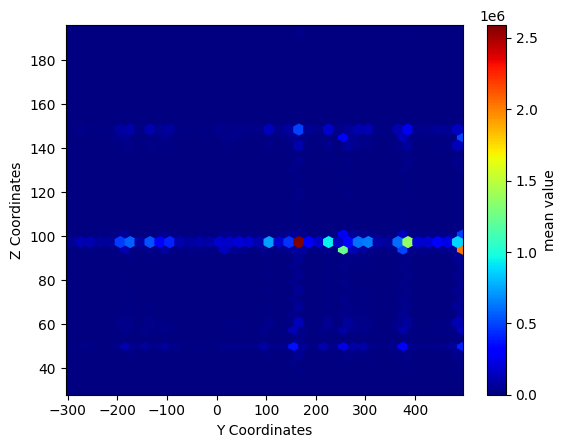

In [8]:
# Generating heat plot in the Y-Z plane for position of the player

Y, Z = NP.meshgrid(y, z)
Y = Y.ravel()
Z = Z.ravel()
gridsize=40
PLT.subplot(111)

PLT.hexbin(Y, Z, gridsize=gridsize, cmap=CM.jet, bins=None)
PLT.axis([Y.min(), Y.max(), Z.min(), Z.max()])
PLT.xlabel('Y Coordinates')
PLT.ylabel('Z Coordinates')

cb = PLT.colorbar()
cb.set_label('mean value')
PLT.show()

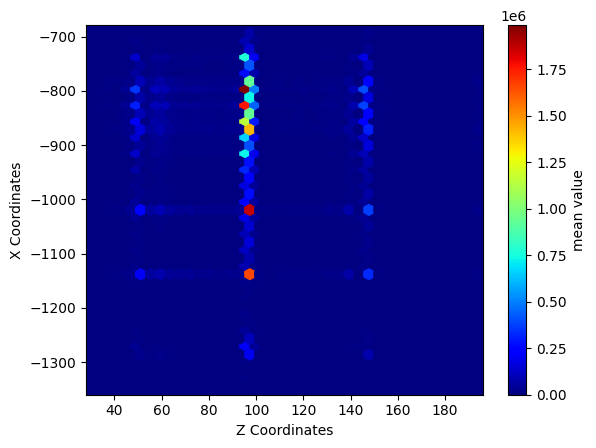

In [9]:
# Generating heat plot in the Z-X plane for position of the player

Z, X = NP.meshgrid(z, x)
Z = Z.ravel()
X = X.ravel()
gridsize=40
PLT.subplot(111)

PLT.hexbin(Z, X, gridsize=gridsize, cmap=CM.jet, bins=None)
PLT.axis([Z.min(), Z.max(), X.min(), X.max()])
PLT.xlabel('Z Coordinates')
PLT.ylabel('X Coordinates')

cb = PLT.colorbar()
cb.set_label('mean value')
PLT.show()  

## Carefelly looking at all the 2 graphs, we can sugges that a player is expected to be present in the following range of co-ordinates with maximum chance:

X-Coordinate range: [-900, -700] 
Y-Coordinate range: [100, 200] 
Z-Coordinate range: [80, 100] 

# 3. (No Coding) Most of the time, our stakeholders (in this case, the CS:GO coaching staff) aren’t tech-savvy enough to run code themselves. Propose a solution to your product manager that:

a. could allow our coaching staff to request or acquire the output themselves

b. takes less than 1 weeks worth of work to implement

->*Answer: Using the scipt writtn above, all of the required analysis will be computed, and the results specific to the input dataset will be rendered. In one week's time, I was able to generate the entire implementation from scratch, and hence it is surely worth than less 1 week of work to devise a fully automated pipeline, that will take the dataset as input, and will then perform all the required analysis for the user input data.* 